In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
#Chargement des données  
spam=pd.read_csv("/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/spam7.csv",sep=";")
spam

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [4]:
seed=10
spam_train,spam_test=train_test_split(spam,random_state=seed)

In [5]:
X_train,Y_train=spam_train.drop('yesno',axis=1),spam_train['yesno']
X_test,Y_test=spam_test.drop('yesno',axis=1),spam_test['yesno']
X_test

,crl.tot,dollar,bang,money,n000,make
1444,479,0.205,0.102,0.96,0.72,0.60
1538,46,0.000,0.326,0.00,0.00,0.00
3992,31,0.000,0.485,0.00,0.00,0.00
4099,26,0.000,0.165,0.00,0.00,0.00
4324,10,0.000,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...
1419,133,0.000,0.936,0.00,0.00,0.00
2688,13,0.000,0.000,0.00,0.00,0.00
3223,78,0.000,0.000,0.00,0.00,0.00
2745,178,0.000,0.000,0.00,0.00,0.00


In [6]:
# Classification avec DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
print(clf.classes_)

['n' 'y']


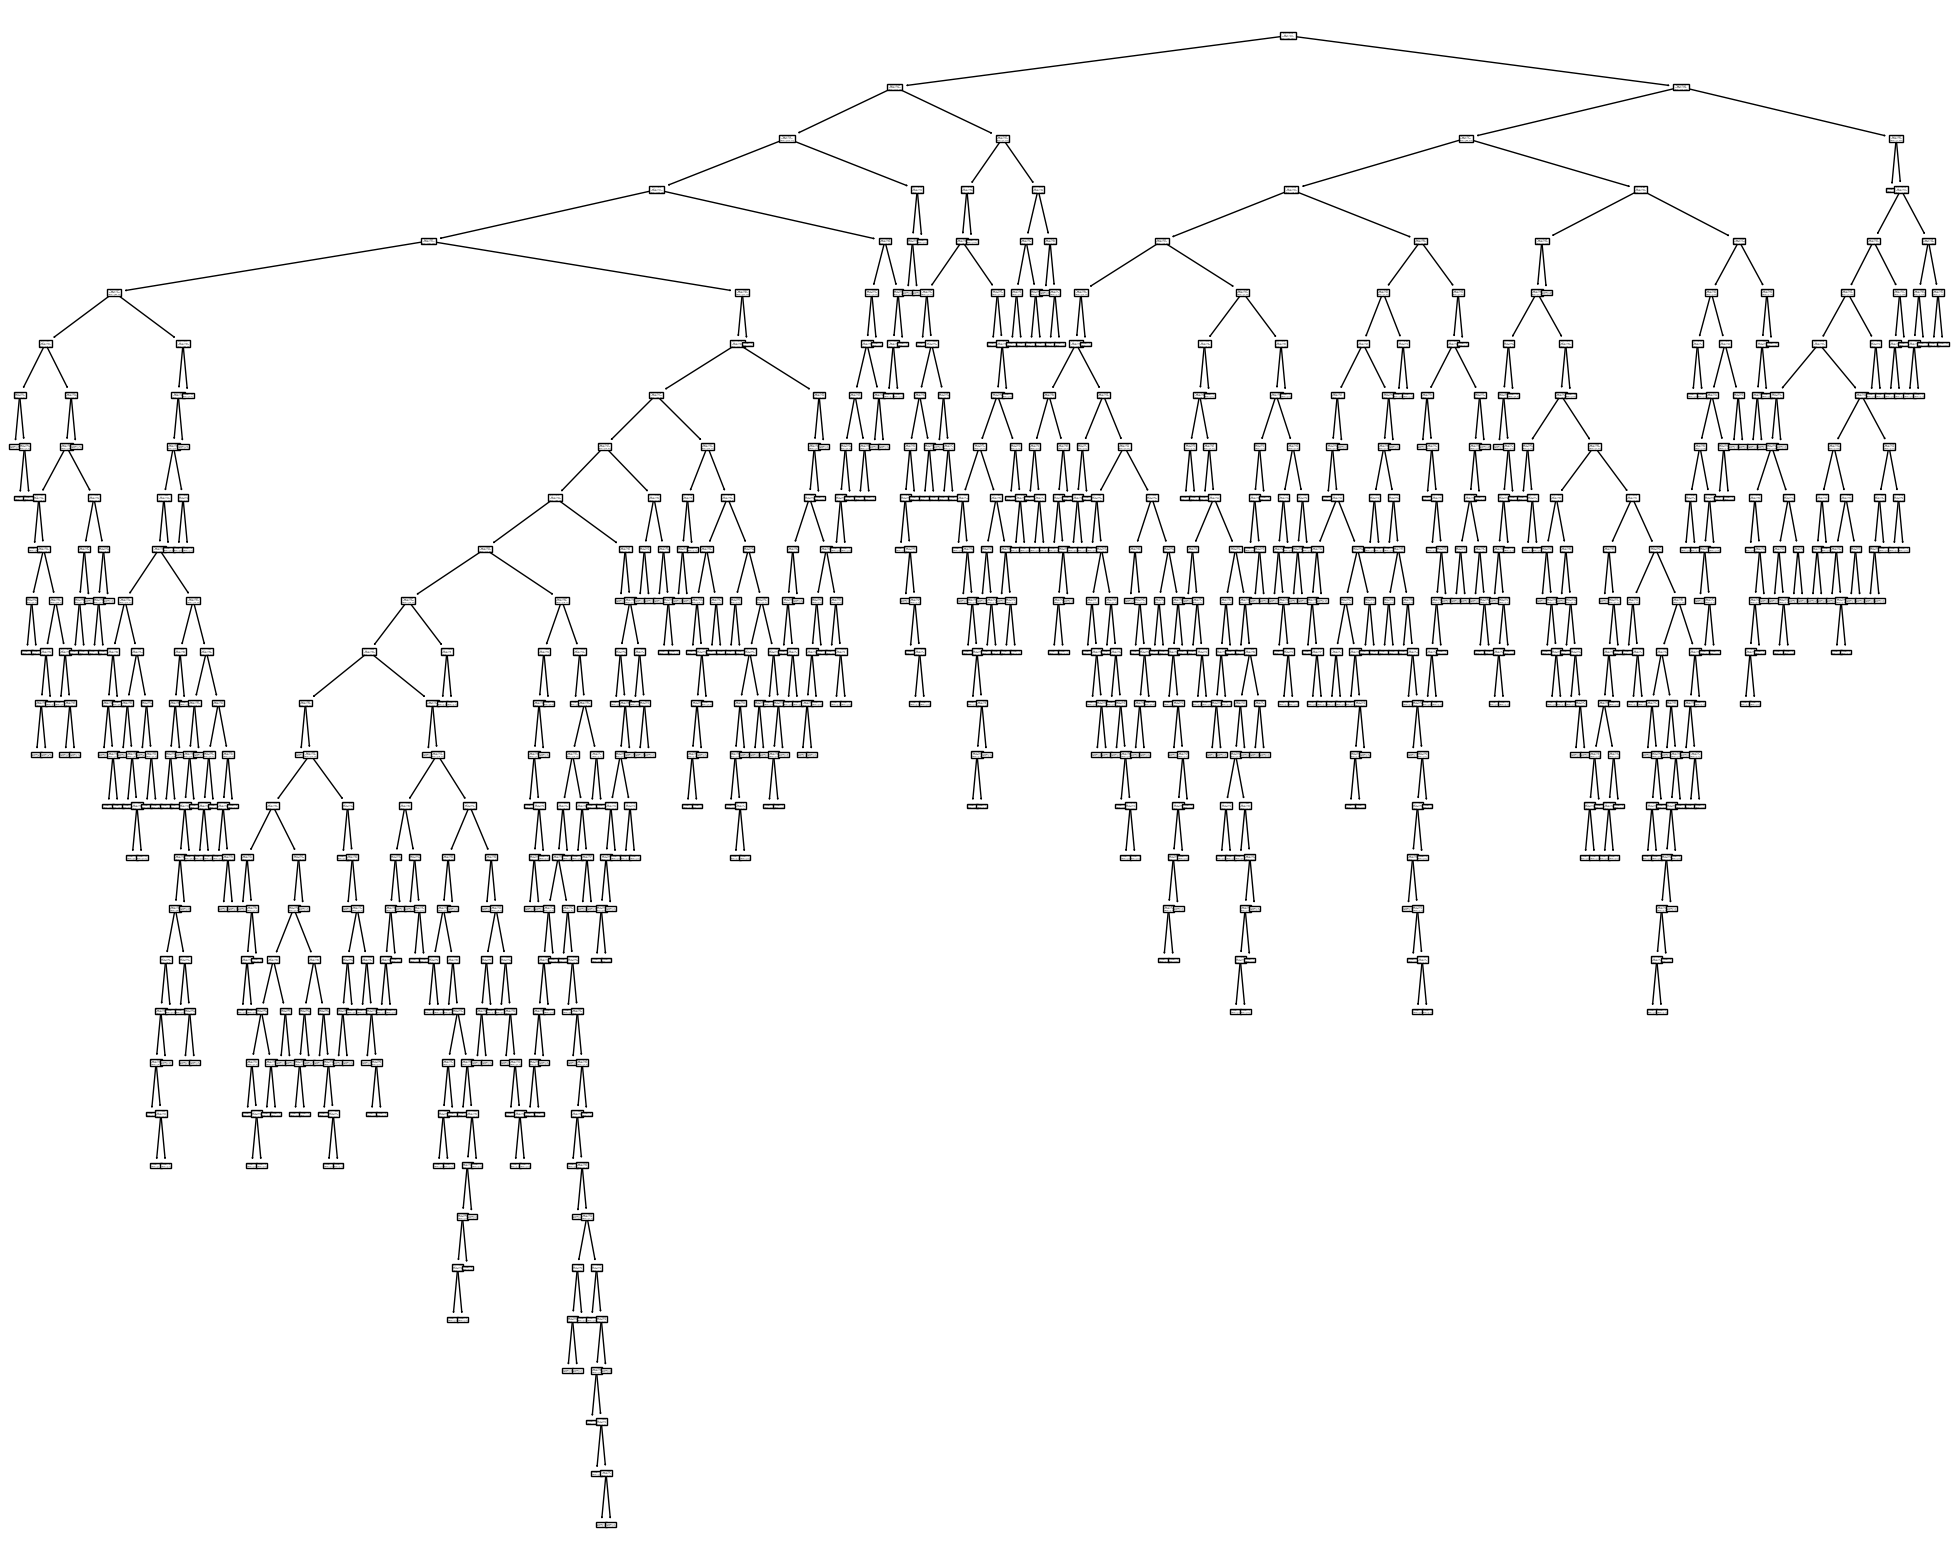

In [7]:
#Affichage de l'arbre
fig=plt.figure(figsize=(25,20))
_= plot_tree(clf)

In [8]:
#Prédiction des classes test
print(clf.predict_proba(X_test[1:6]))

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.95652174 0.04347826]
 [0.         1.        ]]


In [9]:
#Précision:
print(f"La précision est de {round(clf.score(X_train,Y_train),4)*100}% pour l'échantillon d'entraînement")
print(f"La précision est de {round(clf.score(X_test,Y_test),4)*100}% pour l'échantillon test")

La précision est de 97.36% pour l'échantillon d'entraînement
La précision est de 84.97% pour l'échantillon test


In [10]:
#Recherche des meilleurs paramètres
parameters = {'max_depth':range(1, 10),
              'min_samples_split':range(2,10),
              'criterion':('gini', 'entropy'), 
              'ccp_alpha': [0,0.02,0.05,0.1]
             }
dtc = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(dtc, parameters)
clf.fit(X_train, Y_train)
print(f"Meilleur paramètre: {clf.best_params_} avec précision moyenne de {round(clf.best_score_,4)*100}%")

Meilleur paramètre: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8} avec précision moyenne de 87.1%


In [11]:
final_clf = clf.best_estimator_
print(final_clf.predict(X_test))
clf.predict_proba(X_test)

['y' 'n' 'n' ... 'n' 'n' 'n']


array([[0.        , 1.        ],
       [0.89440994, 0.10559006],
       [0.89440994, 0.10559006],
       ...,
       [0.87283951, 0.12716049],
       [0.87283951, 0.12716049],
       [0.8       , 0.2       ]])

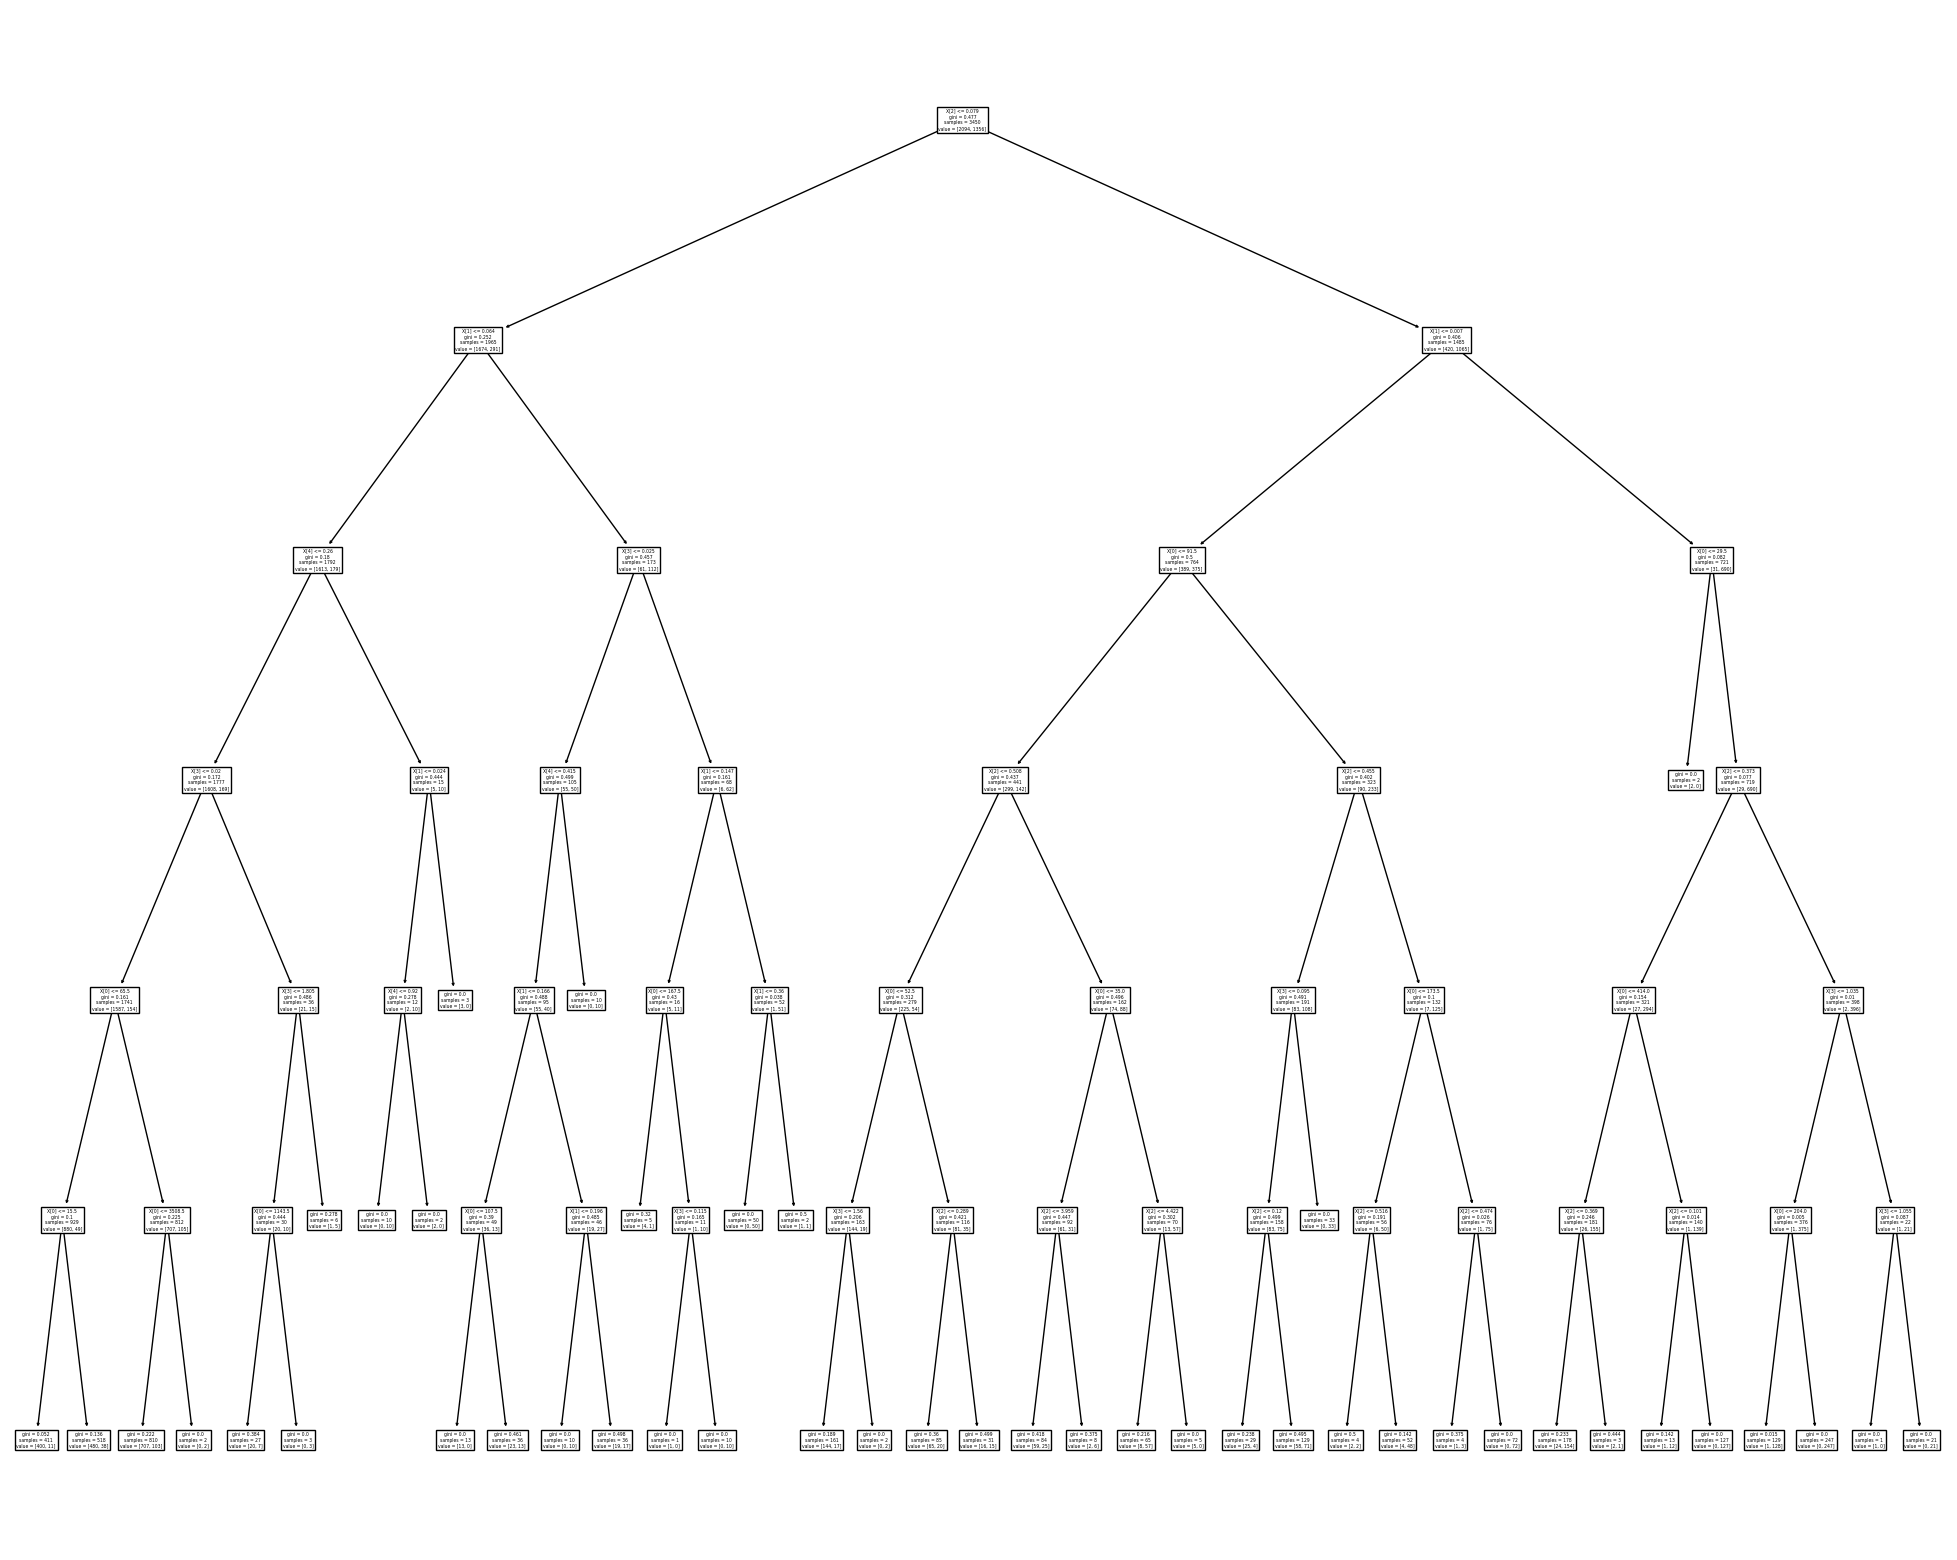

In [11]:
#Affichage de l'arbre optimal
fig=plt.figure(figsize=(25,20))
_= plot_tree(final_clf)

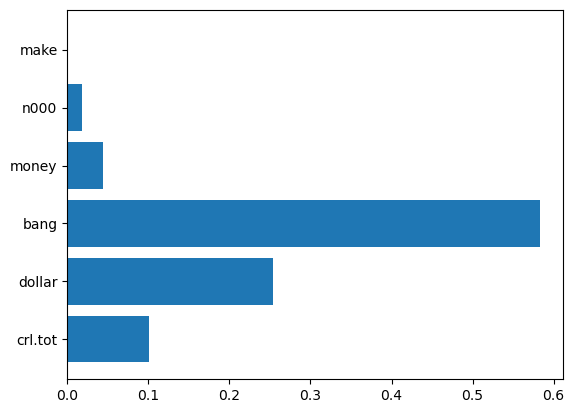

In [12]:
#Graphe de 'features_importances_'
imp=final_clf.feature_importances_
feat=list(X_train.columns)
p=plt.barh(feat,imp)

<Axes: xlabel='bang', ylabel='dollar'>

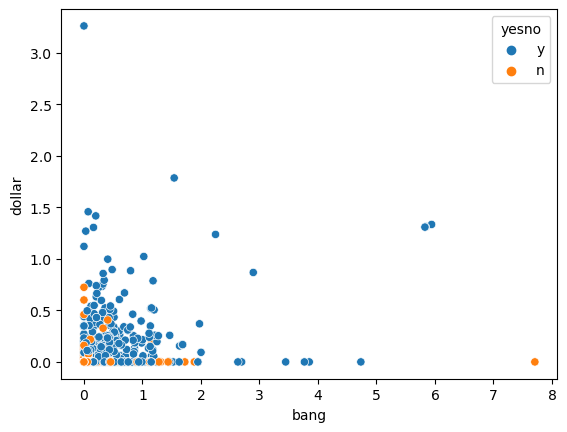

In [13]:
sns.scatterplot(data=X_test,x='bang',y='dollar',hue=Y_test)

In [14]:
#Création du BaggingClassifier et application aux données test
bag=BaggingClassifier(oob_score=True)
bag.fit(X_train,Y_train)
bag.predict_proba(X_test)

/usr/lib64/python3.11/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/lib64/python3.11/site-packages/sklearn/ensemble/_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


array([[0.        , 1.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       ...,
       [0.62666667, 0.37333333],
       [0.4       , 0.6       ],
       [0.475     , 0.525     ]])

In [15]:
#Comparaison des erreurs
print(bag.oob_score_,bag.score(X_test,Y_test)) #Quasiment égaux, égaux à 10^-3 près

0.8588405797101449 0.8540399652476107


In [16]:
#Recherche des meilleurs paramètres
parameters = {'n_estimators':[50,100,200],
              'max_samples':[0.4,0.8,1],
              'max_features':[0.4,0.6,0.8]
             }
bagopt = BaggingClassifier(random_state=0)
clfb = GridSearchCV(bagopt, parameters)
clfb.fit(X_train, Y_train)
print(f"Meilleur paramètre: {clfb.best_params_} avec précision moyenne de {round(clfb.best_score_,4)*100}%")

Meilleur paramètre: {'max_features': 0.8, 'max_samples': 0.4, 'n_estimators': 200} avec précision moyenne de 87.42%


In [17]:
final_bag = clfb.best_estimator_
final_bag.predict(X_test)
clfb.predict_proba(X_test)

array([[0.015     , 0.985     ],
       [0.81767183, 0.18232817],
       [0.73420348, 0.26579652],
       ...,
       [0.55169887, 0.44830113],
       [0.76100244, 0.23899756],
       [0.37041667, 0.62958333]])

In [18]:
#RandomForestClassifier avec paramètres de base
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.predict_proba(X_test)

array([[0.01      , 0.99      ],
       [0.72      , 0.28      ],
       [0.98      , 0.02      ],
       ...,
       [0.67563095, 0.32436905],
       [0.39      , 0.61      ],
       [0.27166667, 0.72833333]])

In [19]:
#Meilleur estimateur
parameters = {'n_estimators':[9,10,11],
              'max_depth':[12,14,16],
              'min_samples_split':[7,8,9],
              'max_samples':[0.1,0.3,0.5],
              'min_impurity_decrease':[0.0001,0.001,0.01]
             }
rfopt = RandomForestClassifier()
clfr = GridSearchCV(rfopt, parameters)
clfr.fit(X_train, Y_train)
print(f"Meilleur paramètre: {clfr.best_params_} avec précision moyenne de {round(clfr.best_score_,4)*100}%")

Meilleur paramètre: {'max_depth': 12, 'max_samples': 0.5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 7, 'n_estimators': 11} avec précision moyenne de 87.88%


In [20]:
final_for = clfr.best_estimator_
final_for.predict(X_test)
clfr.predict_proba(X_test)

array([[0.00584655, 0.99415345],
       [0.8806893 , 0.1193107 ],
       [0.67577164, 0.32422836],
       ...,
       [0.88249144, 0.11750856],
       [0.83844185, 0.16155815],
       [0.32748918, 0.67251082]])

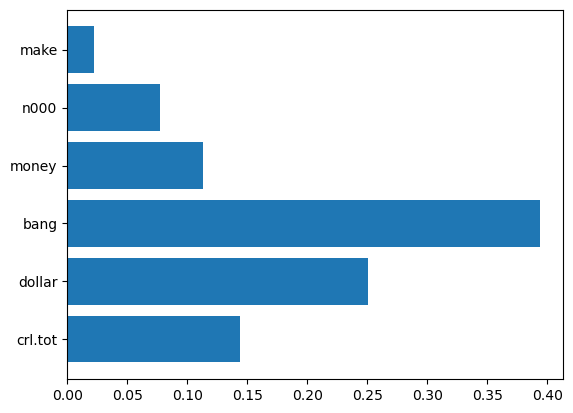

In [21]:
#Graphe de 'features_importances_' pour random forests
imp=final_for.feature_importances_
feat=list(X_train.columns)
p=plt.barh(feat,imp)

In [22]:
#GradientBoostingClassifier avec paramètres de base
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
gb.predict_proba(X_test)

array([[0.01478489, 0.98521511],
       [0.86502216, 0.13497784],
       [0.72159108, 0.27840892],
       ...,
       [0.89679527, 0.10320473],
       [0.86917329, 0.13082671],
       [0.08884397, 0.91115603]])

In [23]:
#Meilleur estimateur
parameters = {'n_estimators':[50,100],
              'learning_rate':[0.01,0.1,0.2],
              'subsample':[0.2,0.5],
              'max_depth':[2,5,7],
              'min_samples_split':[7,8,9],
              'min_impurity_decrease':[0.1,0.01]
             }
gbopt = GradientBoostingClassifier()
clfg = GridSearchCV(gbopt, parameters)
clfg.fit(X_train, Y_train)
print(f"Meilleur paramètre: {clfg.best_params_} avec précision moyenne de {round(clfg.best_score_,4)*100}%")

Meilleur paramètre: {'learning_rate': 0.01, 'max_depth': 7, 'min_impurity_decrease': 0.01, 'min_samples_split': 7, 'n_estimators': 100, 'subsample': 0.2} avec précision moyenne de 88.17%
